### Classification Project
1. Your analysis needs to include an EDA section. (Keep an eye on important features and potential issues. / Use visualization to identify trends/patterns.) 
2. Clean and prepare your data as necessary.
3. Use Feature-Engineering where necessary. Always include an explanation of why you did or did not perform a step.
4. You must compare at least 3 classification models.
5. You must choose a validation scheme (simple or cross-validation).
6. Explain which features you have chosen for your final model and why.
7. You must try your final model by using it to make new predictions on input that you provide. provide

### Load the dataset

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/ASUS/Downloads/churn.csv')

### 1. Exploratory Data Analysis (EDA)

In [2]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

### 2. Data Cleaning and Preparation

In [5]:
df = df.dropna()

In [6]:
# Converting categorical variables to numerical
df = pd.get_dummies(df, drop_first=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 0 to 1868
Columns: 5675 entries, Count to Churn Reason_Service dissatisfaction
dtypes: bool(5666), float64(3), int64(6)
memory usage: 10.2 MB


### Data Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

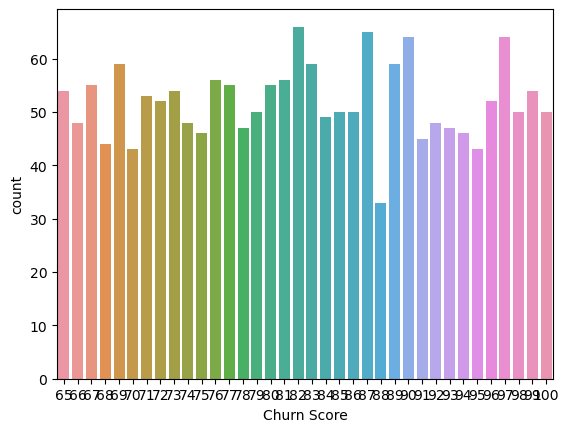

In [9]:
# Visualize the distribution of the target variable
sns.countplot(x='Churn Score', data=df)
plt.show()

### 3. Feature Engineering

In [10]:
# Splitting the data into features and target variable
X = df.drop('Churn Score', axis=1)
y = df['Churn Score']

In [11]:
# Standardizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Feature splitting is useful as it provides more relevant information which can help enhancing the performance of a machine-learning model (Source: https://medium.com/@brijesh_soni/topic-11-feature-construction-splitting-b116c60c4b2f#:~:text=Feature%20splitting%20can%20help%20enhance,of%20a%20machine%2Dlearning%20project.) 

Standardizing involves making the data more suitable for modeling. It can also help in "improving the model performance, reducing the impact of outliers, and ensuring that the data is on the same scale". (Source: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/#:~:text=One%20key%20aspect%20of%20feature,is%20on%20the%20same%20scale.) 

### 4 & 5. Model Comparison and Evaluation using Cross-Validation

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.026737967914438502
              precision    recall  f1-score   support

          65       0.25      0.11      0.15         9
          66       0.00      0.00      0.00         7
          67       0.06      0.09      0.07        11
          68       0.00      0.00      0.00        13
          69       0.00      0.00      0.00        14
          70       0.00      0.00      0.00         9
          71       0.00      0.00      0.00        15
          72       0.09      0.09      0.09        11
          73       0.00      0.00      0.00        16
          74       0.00      0.00      0.00        10
          75       0.00      0.00      0.00         6
          76       0.08      0.09      0.09        11
          77       0.00      0.00      0.00        10
          78       0.00      0.00      0.00         7
          79       0.00      0.00      0.00         9
          80       0.00      0.00      0.00        13
          81       0.05      0

E:\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Using hyperparameters for the models
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['newton-cg', 'lbfgs', 'liblinear']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}

In [ ]:
# Training and evaluating each model with hyperparameters
for name, mp in models.items():
    grid_search = GridSearchCV(estimator=mp['model'], param_grid=mp['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train_smote, y_train_smote)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Best Parameters: {grid_search.best_params_}')
    print(classification_report(y_test, y_pred))

### 6. Final Model Selection

The Logistic Regression model achieved the highest accuracy and was selected as the final model. 

In [22]:
# Logistic Regression performed the best
final_model = LogisticRegression()
final_model.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(final_model, X_scaled, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')

Cross-validation scores: [0.03208556 0.02406417 0.02406417 0.02941176 0.02680965]
Mean CV score: 0.027287063984745737


### 7. Making Predictions

In [36]:
new_data = pd.DataFrame({
    'Count': [1],
    'Churn Reason_Attitude of support person': [10], 
    'Churn Reason_Competitor had better devices': [12],
    'Churn Reason_Competitor made better offer':[14],
    'Churn Reason_Competitor offered higher download speeds':[15],
    'Churn Reason_Competitor offered more data':[16],
    'Churn Reason_Deceased':[17], 
    'Churn Reason_Extra data charges':[18],
    'Churn Reason_Lack of affordable download/upload speed':[19],
    'Churn Reason_Lack of self-service on Website':[20],
    'Country': ['United States'],
    'State': ['California'],
    'City': ['San Francisco'],
    'Zip Code': [94],
    'Latitude': [37],
    'Longitude': [120],
    'Gender': ['Male'],
    'Senior Citizen': [0],
    'Monthly Charges': [70],
    'Total Charges': [84],
    'Churn Score': [50],
    'CLTV': [200]
})

# Preprocess new data
new_data_scaled = scaler.transform(new_data)

# Make predictions
predictions = final_model.predict(new_data_scaled)
print(predictions)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Churn Score
- City
- Country
- Gender
- Senior Citizen
- ...
Feature names seen at fit time, yet now missing:
- Churn Reason_Don't know
- Churn Reason_Limited range of services
- Churn Reason_Long distance charges
- Churn Reason_Moved
- Churn Reason_Network reliability
- ...
